In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from neural_network import *
from keras.callbacks import ModelCheckpoint
import os

In [18]:
def get_loss_acc(history):
    hist = history
    epochs = range(1, len(hist['loss']) + 1)
    val_acc_s = "val_acc"
    acc = "acc"
    if(val_acc_s not in hist):
        acc = "categorical_accuracy"
        val_acc_s="val_categorical_accuracy"
        
    val_loss = hist['val_loss']
    min_val_loss = min(val_loss)
    min_val_loss_idx = val_loss.index(min_val_loss)    
    min_val_loss_row = [min_val_loss, hist[val_acc_s][min_val_loss_idx], hist['loss'][min_val_loss_idx], hist[acc][min_val_loss_idx], epochs[min_val_loss_idx]]

    val_acc = hist[val_acc_s]
    max_val_acc = max(val_acc)
    max_val_acc_idx = val_acc.index(max_val_acc)
    max_val_acc_row = [hist['val_loss'][max_val_acc_idx], max_val_acc, hist['loss'][max_val_acc_idx], hist[acc][max_val_acc_idx], epochs[max_val_acc_idx]]

    return (min_val_loss_row, max_val_acc_row)    

In [19]:
models_dir = './models'
hist_dir = './hist' 

In [30]:
min_val_loss_d = []
max_val_acc_d = []
histories = os.listdir(hist_dir)
for h in histories:
    hist = np.load(f'{hist_dir}/{h}',allow_pickle=True).item()
    min_val_loss_row, max_val_acc_row = get_loss_acc(hist)
    min_val_loss_row.append(h)
    max_val_acc_row.append(h)
    min_val_loss_d.append(min_val_loss_row)
    max_val_acc_d.append(max_val_acc_row)

min_val_loss_df = pd.DataFrame(min_val_loss_d,columns=['val_loss','val_acc','loss','acc','epoch','model'])
max_val_acc_df = pd.DataFrame(max_val_acc_d,columns=['val_loss','val_acc','loss','acc','epoch','model'])

In [31]:
min_val_loss_df
min_val_loss_df['mean_loss'] = ( min_val_loss_df['loss'] + min_val_loss_df['val_loss'] ) / 2
min_val_loss_df['mean_acc'] = ( min_val_loss_df['acc'] + min_val_loss_df['val_acc'] ) / 2

In [32]:
min_val_loss_df = min_val_loss_df.sort_values(['mean_loss'],ascending=False)
min_val_loss_df = min_val_loss_df.reset_index()

In [33]:
max_val_acc_df['mean_loss'] = ( max_val_acc_df['loss'] + max_val_acc_df['val_loss'] ) / 2
max_val_acc_df['mean_acc'] = ( max_val_acc_df['acc'] + max_val_acc_df['val_acc'] ) / 2

In [34]:
max_val_acc_df.sort_values(['val_acc'],ascending=False)

,val_loss,val_acc,loss,acc,epoch,model,mean_loss,mean_acc
19,0.674002,0.865285,0.234462,0.881971,2253,M_29F_8_16_32_ReLu.npy,0.454232,0.873628
12,0.685200,0.854922,0.237231,0.887160,990,M_29F_32_16_ReLu.npy,0.461215,0.871041
10,0.643798,0.849741,0.226810,0.888457,1332,M_29F_16_32_Tanh.npy,0.435304,0.869099
2,0.599544,0.849741,0.238393,0.891051,964,M_29F_16_32_ReLu.npy,0.418969,0.870396
5,0.580024,0.849741,0.226556,0.891051,487,M_29F_16_32_ReLu_P2.npy,0.403290,0.870396
0,0.599178,0.844560,0.241084,0.897536,1483,M_29F_128_ReLu.npy,0.420131,0.871048
13,0.662656,0.844560,0.243291,0.892348,734,M_29F_32_32_ReLu.npy,0.452973,0.868454
11,0.940278,0.844560,0.220493,0.892348,1902,M_29F_16_64_Sigmoid_Adam.npy,0.580385,0.868454
8,0.617391,0.839378,0.223504,0.894942,1509,M_29F_16_32_Sig_Adam.npy,0.420448,0.867160
1,0.797564,0.839378,0.250856,0.892348,1101,M_29F_16_16_ReLu.npy,0.524210,0.865863


In [35]:
min_val_loss_df.sort_values(['val_loss'],ascending=True)

,index,val_loss,val_acc,loss,acc,epoch,model,mean_loss,mean_acc
19,19,0.543526,0.813471,0.282338,0.879377,861,M_29F_8_16_32_ReLu.npy,0.412932,0.846424
21,5,0.547296,0.839378,0.232231,0.891051,463,M_29F_16_32_ReLu_P2.npy,0.389763,0.865214
20,2,0.562321,0.829016,0.249541,0.878080,952,M_29F_16_32_ReLu.npy,0.405931,0.853548
8,4,0.583930,0.751295,0.406951,0.826200,1808,M_29F_16_32_ReLu_Dropout025.npy,0.495441,0.788748
13,15,0.589589,0.787565,0.290717,0.880674,374,M_29F_32_32_ReLu_Sig_P2.npy,0.440153,0.834120
17,0,0.591001,0.808290,0.262262,0.889754,1118,M_29F_128_ReLu.npy,0.426631,0.849022
14,17,0.600256,0.813471,0.276547,0.884565,1202,M_29F_64_ReLu.npy,0.438402,0.849018
16,18,0.605560,0.803109,0.252225,0.889754,899,M_29F_64_Sig_Adam.npy,0.428892,0.846431
18,8,0.614376,0.823834,0.220732,0.897536,1548,M_29F_16_32_Sig_Adam.npy,0.417554,0.860685
12,13,0.616346,0.797927,0.285299,0.885863,454,M_29F_32_32_ReLu.npy,0.450823,0.841895


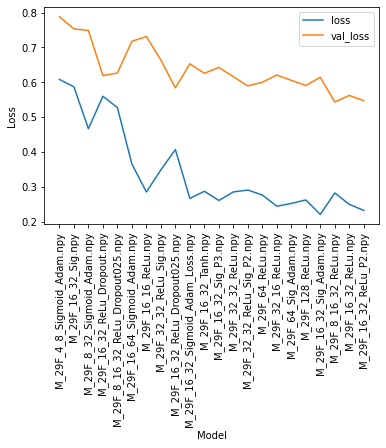

In [36]:
plt.xlabel('Model')
plt.ylabel('Loss')
plt.xticks(min_val_loss_df.index,labels=min_val_loss_df['model'],rotation=90)
for x in ['loss','val_loss']:
    #plt.plot(max_val_acc_df[x])
    plt.plot(min_val_loss_df[x])
plt.legend(['loss','val_loss'])
plt.show()